In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from scipy.optimize import fsolve
%matplotlib inline

In [2]:
# set up variables
length = 25 #(nm)
dx = length/12 #(nm)
dt = 0.016667*332/12 #(s)

In [3]:
# set up constant for follwing calculation
a = 5.6737/2*10**(-6)
b = 4.295*10**(-5)
c = 6.3129*10**(-5)
d = 1.76386*10**(-6)
e = 1.5863*10**(-8)
f = 6.29973*10**(-10)

In [4]:
# import two-phase data
df = pd.read_excel('D.xlsx', sheet_name='4')
A = df['SymbolA']
B = df['SymbolB']
C = df['Li Fraction'] # the concentration in two-phase region

In [8]:
C[0]

0.028169014084507043

In [10]:
def myFunctionA(AA):
 
    for i in range(0,12):
        A[i] = AA[i]
    
    F = np.empty((12))
    
    F[0] = A[0] - C[0]
    F[11] = A[11] - 0
    
    for i in range(1,11):
 
        F[i] = (C[i]-2*A[i]) * ( a*(C[i]-A[i])**2 + b*(C[i]-A[i]) - a*(C[i]-A[i])*C[i] - b*C[i] + c*C[i]**3 - d*C[i]**2 + e*C[i] - f) - (A[i+1]-A[i])**2/(A[i+1]-A[i-1])*dx/dt - (C[i+1]-A[i+1]-C[i]+A[i])**2/(C[i+1]-A[i+1]-1.99*C[i]+1.99*A[i]+C[i-1]-A[i-1])*dx/dt
        
    return F

AAGuess = np.linspace(0.02, 0, 12)
AA = fsolve(myFunctionA,AAGuess)
print(AA)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[2.81585098e-02 1.08349088e-01 1.93442715e-01 4.11667645e-01
 4.78610705e-01 1.45106143e+00 1.63165168e+00 1.72117269e+00
 1.80121426e+00 2.46385126e+00 2.54386105e+00 4.38472723e-06]


In [5]:
def myFunction1(BB):
 
    for i in range(0,12):
        B[i] = BB[i]
    
    F = np.empty((12))
    
    F[0] = B[0] - 0
    F[11] = B[11] - C[11]
    
    for i in range(1,11):
 
        F[i] = (2*B[i]-C[i]) * (a*B[i]**2 + b*B[i] - a*B[i]*C[i] - b*C[i] + c*C[i]**3 - d*C[i]**2 + e*C[i] - f) - ( (C[i+1]-2*B[i+1]-C[i]+2*B[i])**2 / (C[i+1]-B[i+1]-C[i-1]+B[i-1]) *delta_x / delta_t - (B[i+1]-B[i])**2 / (B[i+1]-1.99*B[i]+B[i-1])* delta_x / delta_t )
        
    return F

BBGuess = np.linspace(0, 1, 12)
BB = fsolve(myFunction1,BBGuess)
print(BB[0],BB[6],BB[11])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2.888845185697965e-15 0.2652138559880587 0.807088320080344


C:\Users\user\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [20]:
BB

array([2.88884519e-15, 3.18000542e-02, 6.52265596e-02, 1.01818872e-01,
       1.45239962e-01, 2.00002137e-01, 2.65213856e-01, 3.34357707e-01,
       4.03071788e-01, 5.22602103e-01, 7.76763935e-01, 8.07088320e-01])

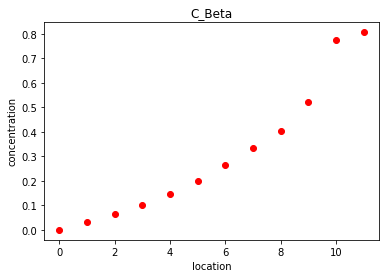

In [21]:
plt.plot(BB, 'ro')
plt.xlabel('location')
plt.ylabel('concentration')
plt.title('C_Beta')
plt.show()

In [22]:
AA = C-BB
AA

0     0.028169
1     0.066791
2     0.103788
3     0.137618
4     0.164619
5     0.180280
6     0.185490
7     0.186769
8     0.188478
9     0.139370
10   -0.044370
11    0.000423
Name: Li Fraction, dtype: float64

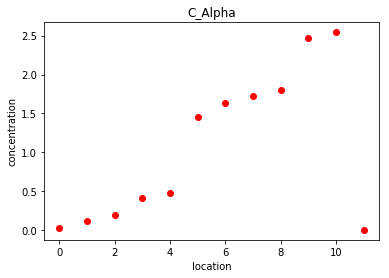

In [11]:
plt.plot(AA, 'ro')
plt.xlabel('location')
plt.ylabel('concentration')
plt.title('C_Alpha')
plt.show()

In [ ]:
def myFunction2(AA):
 
    for i in range(0,12):
        B[i] = AA[i]
    
    F = np.empty((12))
    
    F[0] = B[0] - C[0]
    F[11] = B[11] - 0
    
    for i in range(1,11):
 
        F[i] = (C[i]-2*B[i]) * (a*B[i]**2 + b*B[i] - a*B[i]*C[i] - b*C[i] + c*C[i]**3 - d*C[i]**2 + e*C[i] - f) - ( (C[i+1]-2*B[i+1]-C[i]+2*B[i])**2 / (C[i+1]-B[i+1]-C[i-1]+B[i-1]) *delta_x / delta_t - (B[i+1]-B[i])**2 / (B[i+1]-1.99*B[i]+B[i-1])* delta_x / delta_t )
        
    return F

BBGuess = np.linspace(0, 1, 12)
BB = fsolve(myFunction2,BBGuess)
print(BB[0],BB[6],BB[11])